In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_fake_data():
    

    t_data = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
    V_data = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000] 

    return t_data,V_data

In [3]:
def gompertz_growth(t, V, c, V_max):
    return c * V * np.log(V_max / V)

In [4]:
def logistic_growth(t, V, c, V_max):
    return c * V * (1 - V / V_max)


In [5]:
def ODE_solver(model, t, V0, params, dt=0.1):
    V = [V0]  
    for i in range(1, len(t)):
        V_new = V[-1] + dt * model(t[i], V[-1], **params)  
        V.append(V_new)
    return V


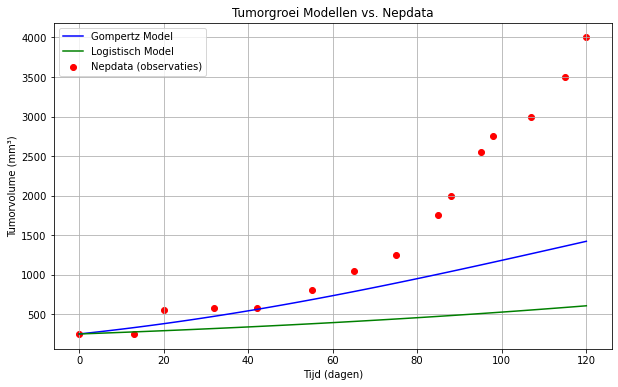

In [6]:
if __name__ == "__main__":
    t_data, V_data = generate_fake_data()

    V0 = 250
    params = {"c":0.1, "V_max":4000}

    tijd = np.linspace(0,120,100)

    V_sim_gompertz = ODE_solver(gompertz_growth, tijd, V0,params)

    V_sim_logistic = ODE_solver(logistic_growth, tijd, V0,params)

  
    plt.figure(figsize=(10, 6))


    plt.plot(tijd, V_sim_gompertz, label="Gompertz Model", color="blue")
    plt.plot(tijd, V_sim_logistic, label="Logistisch Model", color="green")


    plt.scatter(t_data, V_data, color="red", label="Nepdata (observaties)")

 
    plt.title("Tumorgroei Modellen vs. Nepdata")
    plt.xlabel("Tijd (dagen)")
    plt.ylabel("Tumorvolume (mm³)")
    plt.legend()
    plt.grid(True)
    plt.show()
